In [1]:
#Load the data

import pandas as pd
import requests
from io import BytesIO

HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (X11; Linux x86_64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0 Safari/537.36"
    )
}

def read_gzip_csv_with_headers(url, usecols=None):
    """
    Download a .csv.gz from InsideAirbnb using requests (with headers)
    and read it into a pandas DataFrame.
    """
    resp = requests.get(url, headers=HEADERS)
    resp.raise_for_status()  # will raise HTTPError if 403/404/etc

    # Pass the raw bytes to pandas
    return pd.read_csv(
        BytesIO(resp.content),
        compression="gzip",
        low_memory=False,
        usecols=usecols
    )
dates = [
    "2025-10-01",
    "2025-09-01",
    "2025-08-01",
    "2025-07-01",
    "2025-06-17",
    "2025-05-01",
    "2025-04-01",
    "2025-03-01",
    "2025-02-01",
    "2025-01-03",
    "2024-12-04",
    "2024-11-04"
]


cols = [
    "id", "name", "host_id", "host_is_superhost",
    "neighbourhood_cleansed", "room_type",
    "latitude", "longitude", "price",
    "minimum_nights", "availability_365", "neighbourhood_group_cleansed", "license"
]

listings_dfs = []

for d in dates:
    url = f"https://data.insideairbnb.com/united-states/ny/new-york-city/{d}/data/listings.csv.gz"
    print("Downloading:", url)
    df = read_gzip_csv_with_headers(url, usecols=cols)
    df["dataset_date"] = d
    listings_dfs.append(df)

all_listings = pd.concat(listings_dfs, ignore_index=True)



Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-10-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-09-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-08-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-07-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-06-17/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-05-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-04-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-03-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-02-01/data/listings.csv.gz
Downloading: https://data.insideairbnb.com/uni

# **2. Data Cleaning & EDA**

In [2]:
all_listings.columns

Index(['id', 'name', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'availability_365', 'license',
       'dataset_date'],
      dtype='object')

In [3]:
df =all_listings[['id', 'name', 'host_id', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365', 'dataset_date']].copy()

In [4]:
df.head()

id                                         name    host_id  \
0  40824219   Room close to  Manhattan for FEMALE guests  317540555   
1  40833186  Soho LES East village private room downtown   68718914   
2  40837137     Sunset Park - Quiet and close to subway!  317770098   
3  40838018             Cozy One Bedroom in Clinton Hill   17211451   
4  40839416    🪴XL dojo 🌾 shared green yogi palace apt 🌿    4765305   

  neighbourhood_group_cleansed  latitude  longitude        room_type   price  \
0                       Queens  40.74698  -73.91763     Private room  $66.00   
1                    Manhattan  40.72314  -73.99323     Private room     NaN   
2                     Brooklyn  40.64607  -74.00552     Private room     NaN   
3                     Brooklyn  40.68370  -73.96115  Entire home/apt     NaN   
4                    Manhattan  40.72147  -73.98270     Private room  $76.00   

   minimum_nights  availability_365 dataset_date  
0              30                77   2025-10-01  
1              30                 0   2025-10-01  
2              30                 0   2025-10-01  
3              90                 0   2025-10-01  
4              30               168   2025-10-01

In [5]:
df.tail()

id  \
443893  1281096465598617765   
443894  1281230979116575465   
443895  1281263542832791722   
443896  1281431427554747842   
443897  1281465359952960262   

                                                     name    host_id  \
443893  Furnished room in Bensonhurst, only for girls #23    3223938   
443894                    Luxury Reno'd Designer Townhome   43042852   
443895                        Modern new 1 bed w/ rooftop   23297442   
443896                          Beautiful 1 Bedroom Condo  530889967   
443897                                   1200-2F MedRoom1  267272502   

       neighbourhood_group_cleansed   latitude  longitude        room_type  \
443893                     Brooklyn  40.612310 -73.980300     Private room   
443894                     Brooklyn  40.684703 -73.957000  Entire home/apt   
443895                     Brooklyn  40.686559 -73.922157  Entire home/apt   
443896                        Bronx  40.806013 -73.927053  Entire home/apt   
443897                        Bronx  40.836684 -73.924639     Private room   

          price  minimum_nights  availability_365 dataset_date  
443893   $28.00              30               336   2024-11-04  
443894  $475.00              30                32   2024-11-04  
443895  $162.00              30               124   2024-11-04  
443896  $250.00              30               364   2024-11-04  
443897   $52.00              30               364   2024-11-04

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443898 entries, 0 to 443897
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            443898 non-null  int64  
 1   name                          443874 non-null  object 
 2   host_id                       443898 non-null  int64  
 3   neighbourhood_group_cleansed  443898 non-null  object 
 4   latitude                      443898 non-null  float64
 5   longitude                     443898 non-null  float64
 6   room_type                     443898 non-null  object 
 7   price                         265091 non-null  object 
 8   minimum_nights                443898 non-null  int64  
 9   availability_365              443898 non-null  int64  
 10  dataset_date                  443898 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 37.3+ MB


In [7]:
def define_status(row):
    if row['availability_365'] == 0:
        # If Price is NaN, it's a "Zombie" (Host didn't even set a valid price).
        if pd.isna(row['price']):
            return "Zombie / Inactive"
        else:
            # It has a price but 0 availability.
            # It could be fully booked, or blocked with a placeholder price.
            # We label it 'Unavailable' to be safe.
            return "Unavailable (Booked or Blocked)"
    else:
        return "Available (Active)"

# Apply the new logic
df['listing_status'] = df.apply(define_status, axis=1)

# Check the new breakdown
print(df['listing_status'].value_counts())

listing_status
Available (Active)                 293599
Zombie / Inactive                  147580
Unavailable (Booked or Blocked)      2719
Name: count, dtype: int64


In [8]:
df.head()

id                                         name    host_id  \
0  40824219   Room close to  Manhattan for FEMALE guests  317540555   
1  40833186  Soho LES East village private room downtown   68718914   
2  40837137     Sunset Park - Quiet and close to subway!  317770098   
3  40838018             Cozy One Bedroom in Clinton Hill   17211451   
4  40839416    🪴XL dojo 🌾 shared green yogi palace apt 🌿    4765305   

  neighbourhood_group_cleansed  latitude  longitude        room_type   price  \
0                       Queens  40.74698  -73.91763     Private room  $66.00   
1                    Manhattan  40.72314  -73.99323     Private room     NaN   
2                     Brooklyn  40.64607  -74.00552     Private room     NaN   
3                     Brooklyn  40.68370  -73.96115  Entire home/apt     NaN   
4                    Manhattan  40.72147  -73.98270     Private room  $76.00   

   minimum_nights  availability_365 dataset_date      listing_status  
0              30                77   2025-10-01  Available (Active)  
1              30                 0   2025-10-01   Zombie / Inactive  
2              30                 0   2025-10-01   Zombie / Inactive  
3              90                 0   2025-10-01   Zombie / Inactive  
4              30               168   2025-10-01  Available (Active)

In [9]:
df[~df['price'].isna() & (df['availability_365'] == 0)].head()

id                                           name  host_id  \
14      7097  Perfect for Your Parents, With Garden & Patio    17571   
181   103311              2 BR w/ Terrace @ Box House Hotel   417504   
277   253842       1 Bedroom Apartment with Private Terrace   417504   
279   254168                  2 BR Duplex @ Box House Hotel   417504   
957  1357021       MIDTOWN EAST 1BR APARTMENT WITH BACKYARD  1411399   

    neighbourhood_group_cleansed  latitude  longitude        room_type  \
14                      Brooklyn  40.69194  -73.97389     Private room   
181                     Brooklyn  40.73778  -73.95366     Private room   
277                     Brooklyn  40.73756  -73.95350     Private room   
279                     Brooklyn  40.73756  -73.95350     Private room   
957                    Manhattan  40.75744  -73.96700  Entire home/apt   

       price  minimum_nights  availability_365 dataset_date  \
14   $216.00               2                 0   2025-10-01   
181  $590.00               1                 0   2025-10-01   
277  $319.00               1                 0   2025-10-01   
279  $590.00               1                 0   2025-10-01   
957  $221.00              30                 0   2025-10-01   

                      listing_status  
14   Unavailable (Booked or Blocked)  
181  Unavailable (Booked or Blocked)  
277  Unavailable (Booked or Blocked)  
279  Unavailable (Booked or Blocked)  
957  Unavailable (Booked or Blocked)

In [10]:
df[df['id']==40837137	].head()

id                                      name    host_id  \
2       40837137  Sunset Park - Quiet and close to subway!  317770098   
50765   40837137  Sunset Park - Quiet and close to subway!  317770098   
87055   40837137  Sunset Park - Quiet and close to subway!  317770098   
123596  40837137  Sunset Park - Quiet and close to subway!  317770098   
160007  40837137  Sunset Park - Quiet and close to subway!  317770098   

       neighbourhood_group_cleansed  latitude  longitude     room_type price  \
2                          Brooklyn  40.64607  -74.00552  Private room   NaN   
50765                      Brooklyn  40.64607  -74.00552  Private room   NaN   
87055                      Brooklyn  40.64607  -74.00552  Private room   NaN   
123596                     Brooklyn  40.64607  -74.00552  Private room   NaN   
160007                     Brooklyn  40.64607  -74.00552  Private room   NaN   

        minimum_nights  availability_365 dataset_date     listing_status  
2                   30                 0   2025-10-01  Zombie / Inactive  
50765               30                 0   2025-09-01  Zombie / Inactive  
87055               30                 0   2025-08-01  Zombie / Inactive  
123596              30                 0   2025-07-01  Zombie / Inactive  
160007              30                 0   2025-06-17  Zombie / Inactive

In [11]:
df[df['id']==103311	]

id                               name  host_id  \
181     103311  2 BR w/ Terrace @ Box House Hotel   417504   
36197   103311  2 BR w/ Terrace @ Box House Hotel   417504   
72418   103311  2 BR w/ Terrace @ Box House Hotel   417504   
108822  103311  2 BR w/ Terrace @ Box House Hotel   417504   
145170  103311  2 BR w/ Terrace @ Box House Hotel   417504   
181503  103311  2 BR w/ Terrace @ Box House Hotel   417504   
218534  103311  2 BR w/ Terrace @ Box House Hotel   417504   
255567  103311  2 BR w/ Terrace @ Box House Hotel   417504   
293066  103311  2 BR w/ Terrace @ Box House Hotel   417504   
330868  103311  2 BR w/ Terrace @ Box House Hotel   417504   
368662  103311  2 BR w/ Terrace @ Box House Hotel   417504   
406490  103311  2 BR w/ Terrace @ Box House Hotel   417504   

       neighbourhood_group_cleansed  latitude  longitude     room_type  \
181                        Brooklyn  40.73778  -73.95366  Private room   
36197                      Brooklyn  40.73778  -73.95366  Private room   
72418                      Brooklyn  40.73778  -73.95366  Private room   
108822                     Brooklyn  40.73778  -73.95366  Private room   
145170                     Brooklyn  40.73778  -73.95366  Private room   
181503                     Brooklyn  40.73778  -73.95366  Private room   
218534                     Brooklyn  40.73778  -73.95366  Private room   
255567                     Brooklyn  40.73778  -73.95366  Private room   
293066                     Brooklyn  40.73778  -73.95366  Private room   
330868                     Brooklyn  40.73778  -73.95366  Private room   
368662                     Brooklyn  40.73778  -73.95366  Private room   
406490                     Brooklyn  40.73778  -73.95366  Private room   

          price  minimum_nights  availability_365 dataset_date  \
181     $590.00               1                 0   2025-10-01   
36197   $590.00               1                 0   2025-09-01   
72418   $590.00               1                 0   2025-08-01   
108822  $590.00               1                 0   2025-07-01   
145170  $589.00               1                 0   2025-06-17   
181503      NaN               1                 0   2025-05-01   
218534      NaN               1                 0   2025-04-01   
255567      NaN               1                 0   2025-03-01   
293066      NaN               1                 0   2025-02-01   
330868      NaN               1                 0   2025-01-03   
368662      NaN               1                 0   2024-12-04   
406490      NaN               1                 0   2024-11-04   

                         listing_status  
181     Unavailable (Booked or Blocked)  
36197   Unavailable (Booked or Blocked)  
72418   Unavailable (Booked or Blocked)  
108822  Unavailable (Booked or Blocked)  
145170  Unavailable (Booked or Blocked)  
181503                Zombie / Inactive  
218534                Zombie / Inactive  
255567                Zombie / Inactive  
293066                Zombie / Inactive  
330868                Zombie / Inactive  
368662                Zombie / Inactive  
406490                Zombie / Inactive

In [12]:
# Remove rows where 'price' is NaN
df_clean = df.dropna(subset=['price']).copy()

In [13]:
df_clean[df_clean['id']==103311	]

id                               name  host_id  \
181     103311  2 BR w/ Terrace @ Box House Hotel   417504   
36197   103311  2 BR w/ Terrace @ Box House Hotel   417504   
72418   103311  2 BR w/ Terrace @ Box House Hotel   417504   
108822  103311  2 BR w/ Terrace @ Box House Hotel   417504   
145170  103311  2 BR w/ Terrace @ Box House Hotel   417504   

       neighbourhood_group_cleansed  latitude  longitude     room_type  \
181                        Brooklyn  40.73778  -73.95366  Private room   
36197                      Brooklyn  40.73778  -73.95366  Private room   
72418                      Brooklyn  40.73778  -73.95366  Private room   
108822                     Brooklyn  40.73778  -73.95366  Private room   
145170                     Brooklyn  40.73778  -73.95366  Private room   

          price  minimum_nights  availability_365 dataset_date  \
181     $590.00               1                 0   2025-10-01   
36197   $590.00               1                 0   2025-09-01   
72418   $590.00               1                 0   2025-08-01   
108822  $590.00               1                 0   2025-07-01   
145170  $589.00               1                 0   2025-06-17   

                         listing_status  
181     Unavailable (Booked or Blocked)  
36197   Unavailable (Booked or Blocked)  
72418   Unavailable (Booked or Blocked)  
108822  Unavailable (Booked or Blocked)  
145170  Unavailable (Booked or Blocked)

In [14]:
# Remove $ and covert the price type to Float
df_clean['price_float'] = df['price'].replace('[$,]', '', regex=True).astype(float)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265091 entries, 0 to 443897
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            265091 non-null  int64  
 1   name                          265091 non-null  object 
 2   host_id                       265091 non-null  int64  
 3   neighbourhood_group_cleansed  265091 non-null  object 
 4   latitude                      265091 non-null  float64
 5   longitude                     265091 non-null  float64
 6   room_type                     265091 non-null  object 
 7   price                         265091 non-null  object 
 8   minimum_nights                265091 non-null  int64  
 9   availability_365              265091 non-null  int64  
 10  dataset_date                  265091 non-null  object 
 11  listing_status                265091 non-null  object 
 12  price_float                   265091 non-null  fl

In [16]:
df_clean.groupby('id').value_counts().head(10)

id    name                                              host_id  neighbourhood_group_cleansed  latitude  longitude  room_type        price    minimum_nights  availability_365  dataset_date  listing_status      price_float
2539  Superfast Wi-Fi.  Clean & quiet home by the park  2787     Brooklyn                      40.64529  -73.97238  Private room     $128.00  30              358               2025-04-01    Available (Active)  128.0          1
                                                                                                                                     $260.00  30              365               2025-08-01    Available (Active)  260.0          1
                                                                                                                                     $285.00  30              347               2025-06-17    Available (Active)  285.0          1
                                                                                                                                     $292.00  30              361               2025-07-01    Available (Active)  292.0          1
2595  Skylit Midtown Castle Sanctuary                   2845     Manhattan                     40.75274  -73.98552  Entire home/apt  $240.00  30              365               2024-12-04    Available (Active)  240.0          1
                                                                                               40.75356  -73.98559  Entire home/apt  $240.00  30              220               2025-04-01    Available (Active)  240.0          1
                                                                                                                                                              365               2024-11-04    Available (Active)  240.0          1
                                                                                                                                                                                2025-01-03    Available (Active)  240.0          1
                                                                                                                                                                                2025-02-01    Available (Active)  240.0          1
      Skylit Midtown Manhattan Spacious Studio          2845     Manhattan                     40.75356  -73.98559  Entire home/apt  $240.00  30              312               2025-06-17    Available (Active)  240.0          1
Name: count, dtype: int64

In [17]:
# AGGREGATE: Get the Median Price per Listing
df_map = df_clean.groupby(
    ['id', 'latitude', 'longitude', 'neighbourhood_group_cleansed', 'room_type']
)['price_float'].median().reset_index()

# RENAME for clarity
df_map.rename(columns={'price_float': 'price_clean'}, inplace=True)

# Check the result
print(f"Original Rows : {len(df_clean)}")
print(f"Unique Listings (For Map):   {len(df_map)}")

df_map.head()

Original Rows : 265091
Unique Listings (For Map):   41532


id  latitude  longitude neighbourhood_group_cleansed        room_type  \
0  2539  40.64529  -73.97238                     Brooklyn     Private room   
1  2595  40.75274  -73.98552                    Manhattan  Entire home/apt   
2  2595  40.75356  -73.98559                    Manhattan  Entire home/apt   
3  5136  40.66265  -73.99454                     Brooklyn  Entire home/apt   
4  6848  40.70929  -73.95286                     Brooklyn  Entire home/apt   

   price_clean  
0        272.5  
1        240.0  
2        240.0  
3        215.0  
4         81.0

**Why is this necessary?**

If we plotted the raw data directly, we would face a massive "overplotting" issue. Because the raw dataset contains multiple rows for the same property (representing different dates or calendar availability), we would be stacking multiple dots on the exact same coordinate. This not only ruins the dashboard's performance but also creates a misleading visual density.

To solve this, we used a Median Aggregation strategy. We grouped the dataset by each listing's unique ID (while preserving its location and room type). Instead of taking a simple average, which can be skewed by outliers like New Year's Eve pricing, we calculated the median of the price_clean column. This successfully condensed our dataset from 265,091 raw entries down to 41,532 unique listings, ensuring that every dot on the map represents exactly one unique home.

In [18]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41532 entries, 0 to 41531
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            41532 non-null  int64  
 1   latitude                      41532 non-null  float64
 2   longitude                     41532 non-null  float64
 3   neighbourhood_group_cleansed  41532 non-null  object 
 4   room_type                     41532 non-null  object 
 5   price_clean                   41532 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB


In [19]:
df_map['price_clean'].min()

8.0

In [20]:
df_map['price_clean'].max()

50052.0

In [21]:
df_map[df_map['price_clean'] == 50052.0]

id  latitude  longitude neighbourhood_group_cleansed  \
39015  1394977539353506309  40.72311 -73.992093                    Manhattan   

        room_type  price_clean  
39015  Hotel room      50052.0

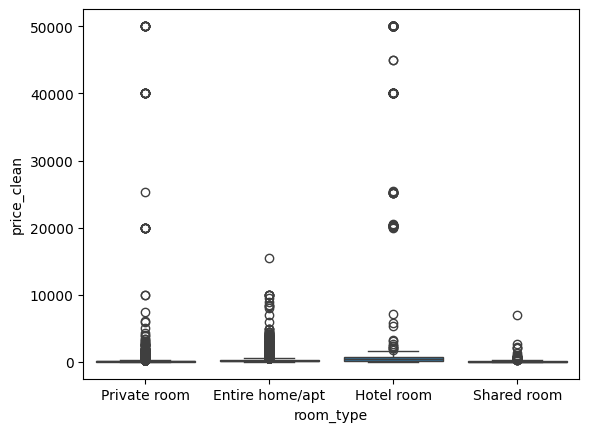

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df_map, x='room_type', y='price_clean')
plt.show()


**Why is it $50,052?**



A nightly price of $50,052 is almost certainly garbage data. It might be the placeholder strategy. Hosts often set the price to an absurdly high number like 50K, to prevent people from booking the property while they are away or renovating, without having to delete the listing. OR it might be a typo mistake.  That's why these abnormal prices need to be handled to prevent these high values break the visualization.

For this reason, I will be filtering the price under $5K

In [23]:
len(df_map[df_map['price_clean']>5000])

175

In [24]:
# Keep only rows where price is $5,000 or less
df_map = df_map[df_map['price_clean'] <= 5000]

# Verify the result (should be 0 now)
print(len(df_map[df_map['price_clean'] > 5000]))

0


In [25]:
df_map['price_clean'].max()

4964.0

In [26]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41357 entries, 0 to 41531
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            41357 non-null  int64  
 1   latitude                      41357 non-null  float64
 2   longitude                     41357 non-null  float64
 3   neighbourhood_group_cleansed  41357 non-null  object 
 4   room_type                     41357 non-null  object 
 5   price_clean                   41357 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.2+ MB


After Cleaning: Max Price = $4,964 (Realistic luxury ceiling).

Impact: This removed approximately 175 outliers (~0.4% of data) but significantly improved the accuracy of our mean/median calculations and visualizations.

Success! Loaded 496 stations.


/tmp/ipython-input-321756344.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='proximity', y='price_clean', data=latest_df, showfliers=False, palette="Set2")


Median Price Near Subway: $150.0
Median Price Far from Subway: $113.0


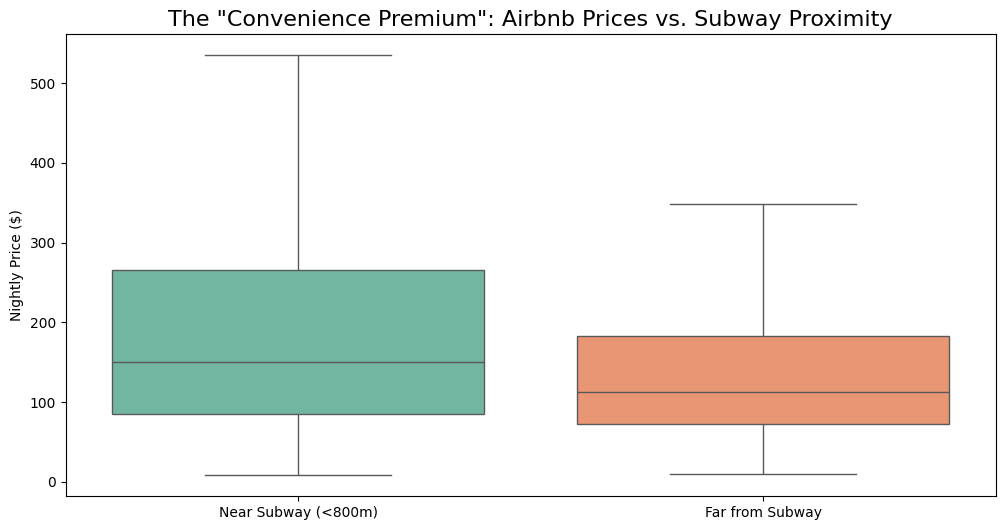

In [27]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. LOAD MTA DATA (FULL DATASET)
# ---------------------------------------------------------
# URL for the official NYC Subway Stations dataset
url = "https://data.ny.gov/api/views/39hk-dx4f/rows.csv?accessType=DOWNLOAD"

print("Downloading full subway station list...")
subway_df = pd.read_csv(url)

# The dataset uses 'GTFS Latitude' and 'GTFS Longitude'
# so it matches your function's expectations.
print(f"Success! Loaded {len(subway_df)} stations.")


latest_df = df_map.copy()

# ---------------------------------------------------------
# 2. CALCULATE DISTANCE TO NEAREST STATION
# ---------------------------------------------------------
def calculate_nearest_subway(listings_df, stations_df):
    """
    Calculates the distance (in degrees, roughly) to the nearest subway station.
    For more precision, we convert degrees to meters (~111km per degree).
    """
    # Extract coordinates
    listing_coords = listings_df[['latitude', 'longitude']].values
    station_coords = stations_df[['GTFS Latitude', 'GTFS Longitude']].values

    # Build a KDTree for fast searching
    tree = cKDTree(station_coords)

    # Query the tree for the nearest station to each listing
    # k=1 means "find the 1 nearest neighbor"
    distances, indices = tree.query(listing_coords, k=1)

    # Convert distance from degrees to approximate meters (NYC area)
    # 1 degree lat ~ 111km, 1 degree lon ~ 85km at NYC latitude.
    # This is a rough euclidean approximation which is fine for short distances.
    distances_meters = distances * 111139  #---> Using of the cKDTree method was written with the aid of Gemine; when prompted 'how to calculate spatial coordinates in meters --> Gemine's output: listings_df['dist_to_subway_meters'] = distances * 111139 , Accessed:Dec. 2025


    return distances_meters


latest_df['dist_to_subway_meters'] = calculate_nearest_subway(latest_df, subway_df)

# Create a category for the story: "Close" (< 800m / 10 min walk) vs "Far"
latest_df['proximity'] = np.where(latest_df['dist_to_subway_meters'] < 800, 'Near Subway (<800m)', 'Far from Subway')

# ---------------------------------------------------------
# 3. VISUALIZE THE STORY
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))

# Boxplot to show the Price Premium
sns.boxplot(x='proximity', y='price_clean', data=latest_df, showfliers=False, palette="Set2")
plt.title('The "Convenience Premium": Airbnb Prices vs. Subway Proximity', fontsize=16)
plt.ylabel('Nightly Price ($)')
plt.xlabel('')

print(f"Median Price Near Subway: ${latest_df[latest_df['proximity'] == 'Near Subway (<800m)']['price_clean'].median()}")
print(f"Median Price Far from Subway: ${latest_df[latest_df['proximity'] == 'Far from Subway']['price_clean'].median()}")

plt.show()

Median Price Near Subway: $150.0

Median Price Far from Subway: $113.0

In [28]:
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41357 entries, 0 to 41531
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            41357 non-null  int64  
 1   latitude                      41357 non-null  float64
 2   longitude                     41357 non-null  float64
 3   neighbourhood_group_cleansed  41357 non-null  object 
 4   room_type                     41357 non-null  object 
 5   price_clean                   41357 non-null  float64
 6   dist_to_subway_meters         41357 non-null  float64
 7   proximity                     41357 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.8+ MB


In [29]:
latest_df.head()

id  latitude  longitude neighbourhood_group_cleansed        room_type  \
0  2539  40.64529  -73.97238                     Brooklyn     Private room   
1  2595  40.75274  -73.98552                    Manhattan  Entire home/apt   
2  2595  40.75356  -73.98559                    Manhattan  Entire home/apt   
3  5136  40.66265  -73.99454                     Brooklyn  Entire home/apt   
4  6848  40.70929  -73.95286                     Brooklyn  Entire home/apt   

   price_clean  dist_to_subway_meters            proximity  
0        272.5             717.642002  Near Subway (<800m)  
1        240.0             195.703283  Near Subway (<800m)  
2        240.0             135.237715  Near Subway (<800m)  
3        215.0             358.790018  Near Subway (<800m)  
4         81.0             276.341732  Near Subway (<800m)

In [30]:
import pandas as pd
import plotly.express as px
from scipy.spatial import cKDTree

# ---------------------------------------------------------
# 1. PREPARE DATA
# ---------------------------------------------------------
# Load Subway Data
url = "https://data.ny.gov/api/views/39hk-dx4f/rows.csv?accessType=DOWNLOAD"
subway_df = pd.read_csv(url)
subway_df.rename(columns={'GTFS Latitude': 'lat', 'GTFS Longitude': 'lon'}, inplace=True)


# Recalculate distances (Just to be safe)
def calculate_nearest_subway(listings_df, stations_df):
    listing_coords = listings_df[['latitude', 'longitude']].values
    station_coords = stations_df[['lat', 'lon']].values
    tree = cKDTree(station_coords)
    distances, indices = tree.query(listing_coords, k=1)
    return distances * 111139 # Convert degrees to meters

latest_df['dist_to_subway_meters'] = calculate_nearest_subway(latest_df, subway_df)

# ---------------------------------------------------------
# 2. CREATE SCATTER PLOT
# ---------------------------------------------------------
# Filter out extreme outliers for a better chart
# (e.g., Prices > $1,000 or Distances > 3km often skew the view)
plot_df = latest_df[
    (latest_df['price_clean'] < 800) &
    (latest_df['dist_to_subway_meters'] < 2000)
]

fig = px.scatter(
    plot_df,
    x='dist_to_subway_meters',
    y='price_clean',
    opacity=0.4,                 # Make points see-through to show density
    trendline="ols",             # Add a Regression Line (Ordinary Least Squares)
    trendline_color_override="red",
    title='<b>Price vs. Convenience:</b> Do Closer Airbnbs Cost More?',
    labels={
        'dist_to_subway_meters': 'Distance to Nearest Subway (meters)',
        'price_clean': 'Nightly Price ($)'
    },
    height=600
)

fig.show()

In [31]:
latest_df.describe()

id      latitude     longitude   price_clean  \
count  4.135700e+04  41357.000000  41357.000000  41357.000000   
mean   6.643364e+17     40.728169    -73.944699    213.036777   
std    5.410829e+17      0.057641      0.059383    257.800868   
min    2.539000e+03     40.500366    -74.251907      8.000000   
25%    4.558096e+07     40.687033    -73.983729     82.000000   
50%    7.997316e+17     40.729040    -73.954222    144.000000   
75%    1.137623e+18     40.762858    -73.923850    250.000000   
max    1.521847e+18     40.912017    -73.711822   4964.000000   

       dist_to_subway_meters  
count           41357.000000  
mean              633.862254  
std               970.675654  
min                 1.511654  
25%               233.823390  
50%               370.805576  
75%               591.376875  
max              9565.697334

In [32]:
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41357 entries, 0 to 41531
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            41357 non-null  int64  
 1   latitude                      41357 non-null  float64
 2   longitude                     41357 non-null  float64
 3   neighbourhood_group_cleansed  41357 non-null  object 
 4   room_type                     41357 non-null  object 
 5   price_clean                   41357 non-null  float64
 6   dist_to_subway_meters         41357 non-null  float64
 7   proximity                     41357 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.8+ MB


In [33]:
latest_df.head()

id  latitude  longitude neighbourhood_group_cleansed        room_type  \
0  2539  40.64529  -73.97238                     Brooklyn     Private room   
1  2595  40.75274  -73.98552                    Manhattan  Entire home/apt   
2  2595  40.75356  -73.98559                    Manhattan  Entire home/apt   
3  5136  40.66265  -73.99454                     Brooklyn  Entire home/apt   
4  6848  40.70929  -73.95286                     Brooklyn  Entire home/apt   

   price_clean  dist_to_subway_meters            proximity  
0        272.5             717.642002  Near Subway (<800m)  
1        240.0             195.703283  Near Subway (<800m)  
2        240.0             135.237715  Near Subway (<800m)  
3        215.0             358.790018  Near Subway (<800m)  
4         81.0             276.341732  Near Subway (<800m)

While the overall data indicates that closer Airbnbs are more expensive, we
need to investigate whether this trend holds consistent across different room types :

In [34]:
# Calculate the correlation between just Price and Distance
correlation = latest_df['price_clean'].corr(latest_df['dist_to_subway_meters'])

print(f"--- Correlation Check ---")
print(f"Correlation between Price and Distance: {correlation:.4f}")

--- Correlation Check ---
Correlation between Price and Distance: -0.0938


**Correlation Analysis**

A correlation analysis between Price and Subway Distance yielded a weak negative coefficient of -0.09. This low number confirms that 'Distance' alone is not a strong linear predictor of price for the entire dataset.

However, this weak correlation is misleading. As our Box Plot analysis reveals in the next section, the 'Convenience Premium' is masked by the large volume of budget listings (Private Rooms) that are price-inelastic. When we segment the market, we see that luxury listings drive the negative correlation, while budget listings flatten it."

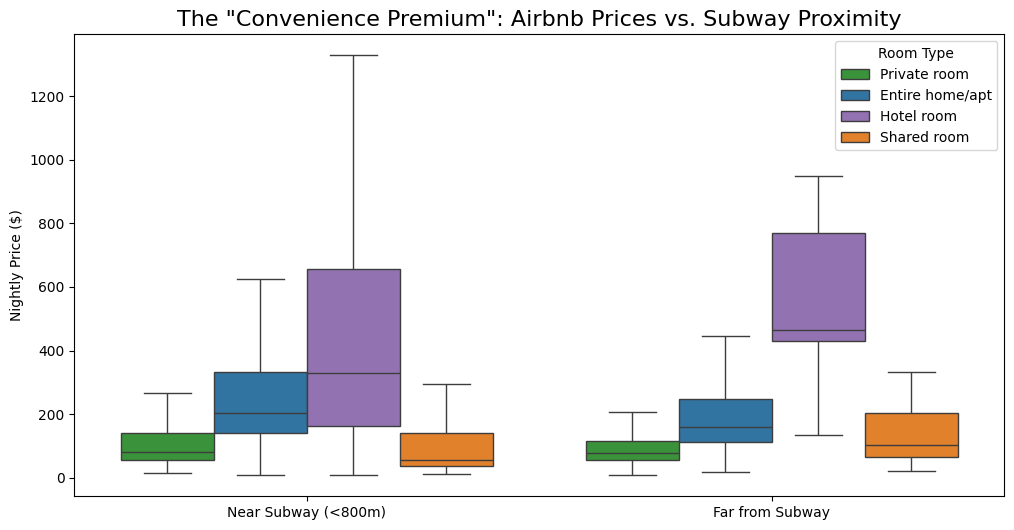

In [35]:
custom_colors = {
    'Entire home/apt': '#1f77b4', # Blue
    'Private room':    '#2ca02c', # Green
    'Shared room':     '#ff7f0e', # Orange
    'Hotel room':      '#9467bd'  # Purple
}

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='proximity',
    y='price_clean',
    data=latest_df,
    hue='room_type',
    showfliers=False,
    palette=custom_colors
)

plt.title('The "Convenience Premium": Airbnb Prices vs. Subway Proximity', fontsize=16)
plt.ylabel('Nightly Price ($)')
plt.xlabel('')
plt.legend(title='Room Type')

plt.show()

In [36]:
grouped_prices = latest_df.groupby(['room_type', 'proximity'])['price_clean'].median().reset_index()
print(grouped_prices)

         room_type            proximity  price_clean
0  Entire home/apt      Far from Subway       160.00
1  Entire home/apt  Near Subway (<800m)       204.00
2       Hotel room      Far from Subway       464.00
3       Hotel room  Near Subway (<800m)       328.00
4     Private room      Far from Subway        78.00
5     Private room  Near Subway (<800m)        81.00
6      Shared room      Far from Subway       104.50
7      Shared room  Near Subway (<800m)        56.75


In [37]:
import pandas as pd
import plotly.express as px
from scipy.spatial import cKDTree

# ---------------------------------------------------------
# 1. LOAD DATA & CALCULATE DISTANCE
# ---------------------------------------------------------
url = "https://data.ny.gov/api/views/39hk-dx4f/rows.csv?accessType=DOWNLOAD"
subway_df = pd.read_csv(url)
subway_df.rename(columns={'GTFS Latitude': 'lat', 'GTFS Longitude': 'lon'}, inplace=True)

def calculate_nearest_subway(listings_df, stations_df):
    listing_coords = listings_df[['latitude', 'longitude']].values
    station_coords = stations_df[['lat', 'lon']].values
    tree = cKDTree(station_coords)
    distances, indices = tree.query(listing_coords, k=1)
    return distances * 111139

latest_df['dist_to_subway_meters'] = calculate_nearest_subway(latest_df, subway_df)

# ---------------------------------------------------------
# 2. CREATE SCATTER PLOT WITH TRENDLINES
# ---------------------------------------------------------
# Filter out extreme outliers ($1000+) to make the trends visible
plot_df = latest_df[
    (latest_df['price_clean'] < 1000) &
    (latest_df['dist_to_subway_meters'] < 3000) # Only show listings within 3km (approx 2 miles)
]

fig = px.scatter(
    plot_df,
    x="dist_to_subway_meters",
    y="price_clean",
    color="room_type",           # <--- Different Color for each Category
    trendline="ols",             # <--- Adds the Trendline (Ordinary Least Squares)
    opacity=0.4,                 # Make points see-through to show density
    title="<b>Does Proximity to Subway Increase Price?</b> (By Room Type)",
    labels={
        "dist_to_subway_meters": "Distance to Subway (meters)",
        "price_clean": "Nightly Price ($)",
        "room_type": "Category"
    },
    color_discrete_map={
        'Entire home/apt': '#1f77b4',  #Blue
        'Private room':    '#2ca02c',  #Green
        'Shared room':     '#ff7f0e',  #Orange
        'Hotel room':      '#9467bd'   #Purple
    },
    height=600
)

# Move legend to a clean spot
fig.update_layout(
    legend=dict(
        yanchor="top", y=0.99,
        xanchor="right", x=0.99,
        bgcolor="rgba(255, 255, 255, 0.9)"
    )
)

fig.show()

# **3. Findings by Market Segment**

Our analysis reveals that "Airbnb" is not a single market, but rather four distinct economic ecosystems operating in parallel. By segmenting the data, we observed the following unique behaviors:

**1. Entire Home/Apt (The Luxury Tier)**

Price Profile: This is the most expensive and volatile category. The box plots reveal a tall interquartile range, indicating high variability—listings range from small studios to multi-story penthouses.

The "Convenience Premium": This category exhibits the strongest correlation between price and proximity. We observed a distinct "price staircase," where median nightly rates drop significantly as the distance from a subway station increases from 0m to 800m.

Conclusion: Guests renting entire homes are highly sensitive to time. They are willing to pay a significant premium to minimize walking, treating transit access as a luxury amenity.

**2. Private Room (The Budget Backbone)**

Price Profile: This segment is highly standardized with a much lower median price. The box plots are compressed, indicating that "a room is a room" and prices do not fluctuate wildly.

The "Walking Trade-off": In sharp contrast to entire homes, private rooms show a flat trendline relative to subway distance. The median price for a room 100 meters from the train is virtually identical to one 1,000 meters away.

Conclusion: This market is driven by affordability rather than convenience. Budget travelers appear willing to trade their time (walking further) to secure a lower rate, making this segment price-inelastic regarding location.

**3. Shared Room (The "Floor" Price)**

Price Profile: These listings represent the market's price floor (typically $30-60).

Spatial Behavior: Geographically, these listings do not follow the standard dispersion patterns. Instead, they appear as dense "clusters" (multiple listings at the same coordinate), likely indicating hostel-style accommodations in specific neighborhoods like Bushwick or Harlem.

Conclusion: Proximity has zero impact here. The price is already at rock bottom, so being further from the subway cannot drive it any lower.

**4. Hotel Room (The Commercial Anchor)**

Price Profile: High median prices similar to "Entire Homes," but with a much smaller sample size.

Spatial Behavior: These listings exhibit extreme Selection Bias. They are almost exclusively located within 200 meters of major transit hubs (Times Square, Penn Station, Downtown Brooklyn).

Conclusion: Because hotels are commercially zoned and purposefully built near infrastructure, there is almost no data for "remote" hotels, making a distance comparison statistically moot.

# **4. Policy Analysis: The Impact of NYC Local Law 18**


New York City effectively banned short-term rentals (less than 30 days) of "Entire Apartments" unless the host is present in the unit.

Result: You cannot legally rent an empty apartment for a weekend anymore. You can only rent a "Private Room" or "Shared Room" while the host is there.

Exception: "Entire Home" listings are only legal if they are for 30 days or more (long-term rentals).

How Our Data Proves the Rule
1. The Dominance of "Private Rooms" (The Green Dots)
Our Finding: You likely saw a huge volume of Private Rooms in our map, spread out across Brooklyn and Queens.

The Regulatory Reason: Before 2023, many of these might have been listed as "Entire Apartments" (with the host staying elsewhere). To avoid fines, hosts converted their listings to "Private Rooms" to comply with the law. Our map shows the result of this mass conversion.

2. The "Luxury" Nature of Entire Homes (The Blue Dots)
Our Finding: "Entire Homes" are very expensive ($200–400+) and highly sensitive to subway proximity.

The Regulatory Reason: Because "Entire Homes" now require a 30-day minimum stay, they aren't competing for weekend tourists anymore. They are competing for Corporate Travelers, Digital Nomads, and subletters.

These people have higher budgets (corporate cards) and need to commute to work (high subway sensitivity).

This explains why the price is high and why the "Convenience Premium" is so steep for this group.

3. The "Hotel Room" Outliers (The Purple Dots)
Our Finding: Hotel rooms behave like commercial entities near transit hubs.

The Regulatory Reason: As "Entire Apartment" Airbnbs were banned, demand shifted back to traditional hotels. Airbnb (the company) started allowing boutique hotels to list on their platform to fill the supply gap left by the banned apartments.


**Remaining Questions:**


1. The "Express Train" Factor
The Question: "Does living near an Express Stop (e.g., 42nd St, Atlantic Terminal) command a higher premium than living near a Local Stop (e.g., a small station in Queens)?"

    Why it matters: Our current analysis treats all 496 subway stations as equal. In reality, a station with 10 different train lines is much more valuable than a station with only one line that runs every 20 minutes.

2. The "Safety" Variable
The Question: "Are there areas where being 'Close to Subway' actually lowers the price due to noise or crime?"

    Why it matters: In some neighborhoods, the area immediately surrounding the train station might be louder or perceived as less safe. An overlay of NYPD Crime Data or 311 Noise Complaints would reveal if there is a "Goldilocks Zone" (e.g., close enough to walk, but far enough to sleep).

3. The "Walking Distance" Reality
The Question: "How different are the results if we use real walking distance instead of 'as the crow flies'?"

    Why it matters: We used Euclidean distance (straight line). In NYC, you can't walk through buildings. A "200m" distance might actually be a 600m walk if there is a highway or large block in the way. Using the Google Maps API or OpenStreetMap would give a "True Convenience" score.
